In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop
import pandas as pd
import tensorflow as tf

In [2]:
def load_data(data_path):
    data = pd.read_csv(data_path) #Read dataset from file csv
    data = data.values #Load values
    np.random.shuffle(data) #Shuffle dataset
    x = data[:, 1:].reshape(-1, 28, 28, 1)/255.0
    y = data[:, 0].astype(np.int32)
    y = tf.keras.utils.to_categorical(y, 10)
    return x, y
X_train, y_train = load_data("../input/fashionmnist/fashion-mnist_train.csv")
X_test, y_test = load_data("../input/fashionmnist/fashion-mnist_test.csv")
X = X_test

<function matplotlib.pyplot.show(close=None, block=None)>

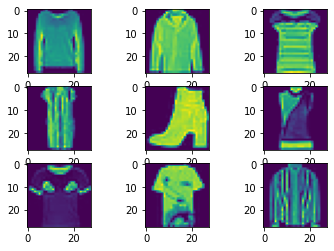

In [3]:
for i in range(9):
  plt.subplot(330 + i + 1)
  plt.imshow(X_train[i])
plt.show

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [5]:
model = Sequential()
model.add(Dense(512, activation = 'relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation = 'softmax'))
model.summary()

2022-05-16 03:58:30.102692: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-16 03:58:30.223465: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-16 03:58:30.224555: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               5

2022-05-16 03:58:30.227622: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-16 03:58:30.228010: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-16 03:58:30.229281: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-16 03:58:30.230538: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [6]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])

In [7]:
history = model.fit(X_train, y_train, batch_size = 128, epochs = 30, verbose = 1, validation_data = (X_test, y_test))

2022-05-16 03:58:33.124857: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
469/469 [==============================] - 4s 5ms/step - loss: 0.6411 - accuracy: 0.7675 - val_loss: 0.4397 - val_accuracy: 0.8428
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.4656 - accuracy: 0.8332 - val_loss: 0.4516 - val_accuracy: 0.8437
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.4354 - accuracy: 0.8482 - val_loss: 0.4479 - val_accuracy: 0.8452
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.4195 - accuracy: 0.8566 - val_loss: 0.3894 - val_accuracy: 0.8721
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 0.4078 - accuracy: 0.8583 - val_loss: 0.4180 - val_accuracy: 0.8592
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.4080 - accuracy: 0.8634 - val_loss: 0.4291 - val_accuracy: 0.8434
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.4014 - accuracy: 0.8643 - val_loss: 0.4038 - val_accuracy: 0.8630
Epoch 

In [8]:
score = model.evaluate(X_test, y_test, verbose = 1)

313/313 [==============================] - 1s 2ms/step - loss: 0.5722 - accuracy: 0.8811


In [9]:
model.save('fashion-mnist_ann.h5')

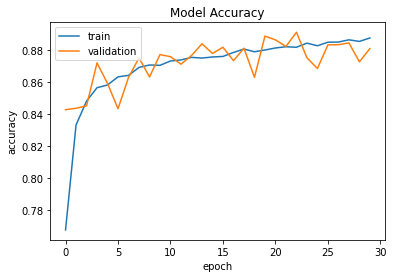

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')

In [11]:
y_pred = model.predict(X_test)

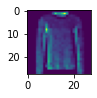

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


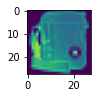

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


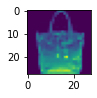

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


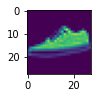

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


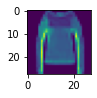

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


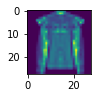

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


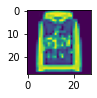

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


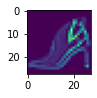

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


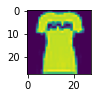

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
for i in range(9):
  plt.subplot(330 + i +1)
  plt.imshow(X[i])
  plt.show()  
  print(np.round(y_pred[i]))